## Individual Assignment 1, International Climate Policy

- Neil Stein, 12410247

- [Github URL](https://github.com/neil-stein/Assignment-1_ICP.git)


In [174]:
# Setup steps
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import geopandas
import warnings
import scipy
import time

warnings.filterwarnings("ignore")

# data loading
perth_df = pd.read_csv("indiv1_perth_airport.csv")
gmst_df = pd.read_csv("indiv1_gmst_monthly_fixed.csv")
us_income_df = pd.read_csv("indiv1_us_counties_incomes.csv")
us_temp_df = pd.read_csv("indiv1_us_counties_temperature.csv")


![Alt text](Part_1_Images/parta_b.jpeg "Part A and B")
![Alt text](Part_1_Images/partc_e.jpeg "Part C to E")


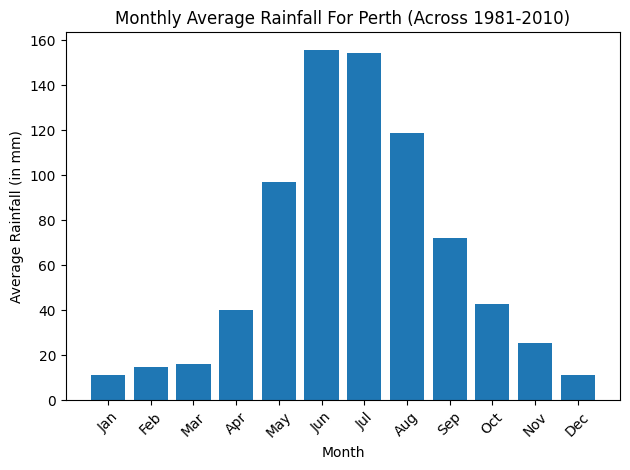

In [175]:
# Problem 2 - Perth
# part(a) - Plotting monthly precipitation

# cleanup and reorienting the data to be grouped by month
perth_df = perth_df.dropna()
perth_df['DATE'] = pd.to_datetime(perth_df['DATE'], format= '%Y-%m')
perth_df['MONTH'] = perth_df['DATE'].dt.month
# for future steps!
perth_df['YEAR'] = perth_df['DATE'].dt.year

# subset the data to get 1981 - 2010
start_date = pd.to_datetime('1981-01-01')
end_date = pd.to_datetime('2010-12-31')
filtered_perth_df = perth_df[(perth_df['DATE'] >= start_date) & (perth_df['DATE'] <= end_date)]

# creating our monthly averages
perth_monthly = perth_df.groupby('MONTH')['PRCP'].mean()


# setting up the plotting
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.bar(months, perth_monthly.values)
plt.xlabel("Month")
plt.ylabel("Average Rainfall (in mm)")
plt.title("Monthly Average Rainfall For Perth (Across 1981-2010)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Problem 2(a) - interpretation
We can see from the chart that __June__ is slightly higher in terms of precipitation for the time slice of focus within the rainfall data from the Perth Airport. However, it would have been July if I had not included a 'dropna' step in my code, which was done to ensure that the next parts of the analysis would not suffer if I choose to use statistical analyses that require all values to be present & filled.

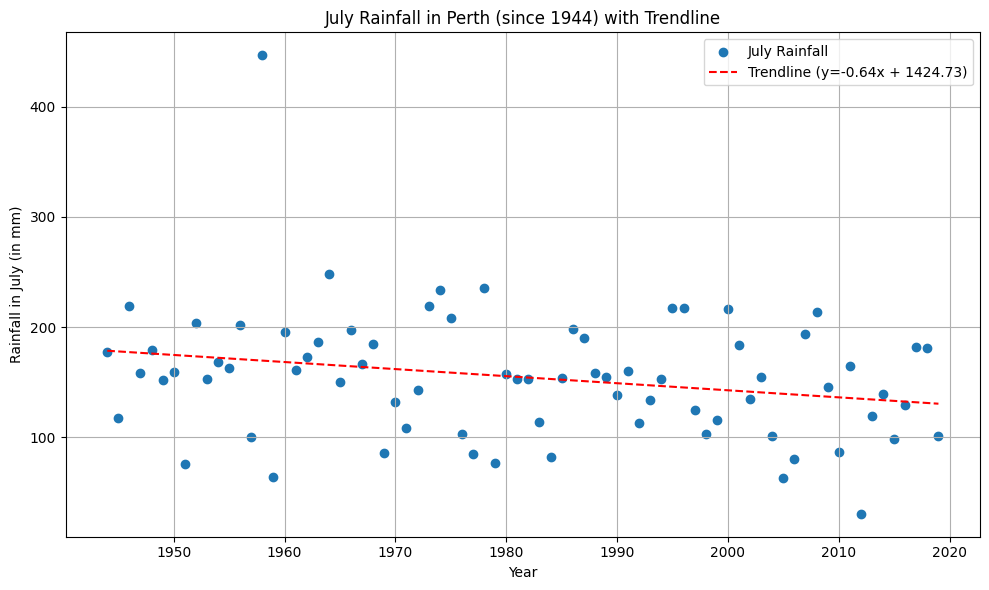

In [176]:
# Problem 2(b) - Plotting July Rainfall trends

# creating a July-specific dataset
perth_july_df = perth_df[perth_df['MONTH'] == 7]

# plotting the July-only trendline
from scipy.stats import linregress

# Calculate the trendline
slope, intercept, r_value, p_value, std_err = linregress(perth_july_df['YEAR'], perth_july_df['PRCP'])
trendline = slope * perth_july_df['YEAR'] + intercept

# Plot the trendline
plt.figure(figsize=(10, 6))
plt.scatter(perth_july_df['YEAR'], perth_july_df['PRCP'], label='July Rainfall')
plt.plot(perth_july_df['YEAR'], trendline, color='red', linestyle='--', label=f'Trendline (y={slope:.2f}x + {intercept:.2f})')

plt.xlabel("Year")
plt.ylabel("Rainfall in July (in mm)")
plt.title("July Rainfall in Perth (since 1944) with Trendline")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [177]:
# Problem 2(b) - Plotting July Rainfall trends - Continued
# exploring the early (1951 - 1980) and late (1981 - 2010) differences

# setting the timeframes and slicing
early_start_date = pd.to_datetime('1951-01-01')
early_end_date = pd.to_datetime('1980-12-31')
late_start_date = pd.to_datetime('1981-01-01')
late_end_date = pd.to_datetime('2011-01-01')

early_perth_df = perth_july_df[(perth_july_df['DATE'] >= early_start_date) & (perth_july_df['DATE'] <= early_end_date)]
late_perth_df = perth_july_df[(perth_july_df['DATE'] >= late_start_date) & (perth_july_df['DATE'] <= late_end_date)]

# statistical test here will be checking the different trend lines
e_slope, e_intercept, e_r_value, e_p_value, e_std_err = linregress(early_perth_df['YEAR'], early_perth_df['PRCP'])
e_trendline = e_slope * early_perth_df['YEAR'] + e_intercept

l_slope, l_intercept, l_r_value, l_p_value, l_std_err = linregress(late_perth_df['YEAR'], late_perth_df['PRCP'])
l_trendline = l_slope * late_perth_df['YEAR'] + l_intercept

# printing our outputs for comparison
print(f"\nEarly Trendline Equation: y = {e_slope:.2f}x + {e_intercept:.2f}")
print(f"R-squared value: {e_r_value**2:.2f}")
print(f"p-value: {e_p_value}")
print(f"\nLate Trendline Equation: y = {l_slope:.2f}x + {l_intercept:.2f}")
print(f"R-squared value: {l_r_value**2:.2f}")
print(f"p-value: {l_p_value}")


Early Trendline Equation: y = -0.94x + 2015.97
R-squared value: 0.01
p-value: 0.5557170847853263

Late Trendline Equation: y = -0.49x + 1129.55
R-squared value: 0.01
p-value: 0.601563230371377


# 2(b) - interpretation

Looking at our output results, we can see that there is a steeper slope for the earlier era (1951 - 1980) than for the later era (1981 - 2010), which indicates that rainfall fell more steeply per year in July in the older era of our Perth data. This might sound surprising given that climate change has been accelerating since the early era and is becoming more difficult towards the present era, however the earlier era also had a much higher intercept, meaning that this simple statistical model predicts that the history of the area had much better rainfall than the more contemporary era.

For both analyses, the p-values did not indicate statistical significance, likely due to the small nature of the sample size. However, these trendlines are a good tool for us to consider as general predictions, if we were seeking to get better statistical significance we would expand to include neighbouring weatherstations to the Perth Airport and generate a sample large enough to deliver a reasonable level of meaning.

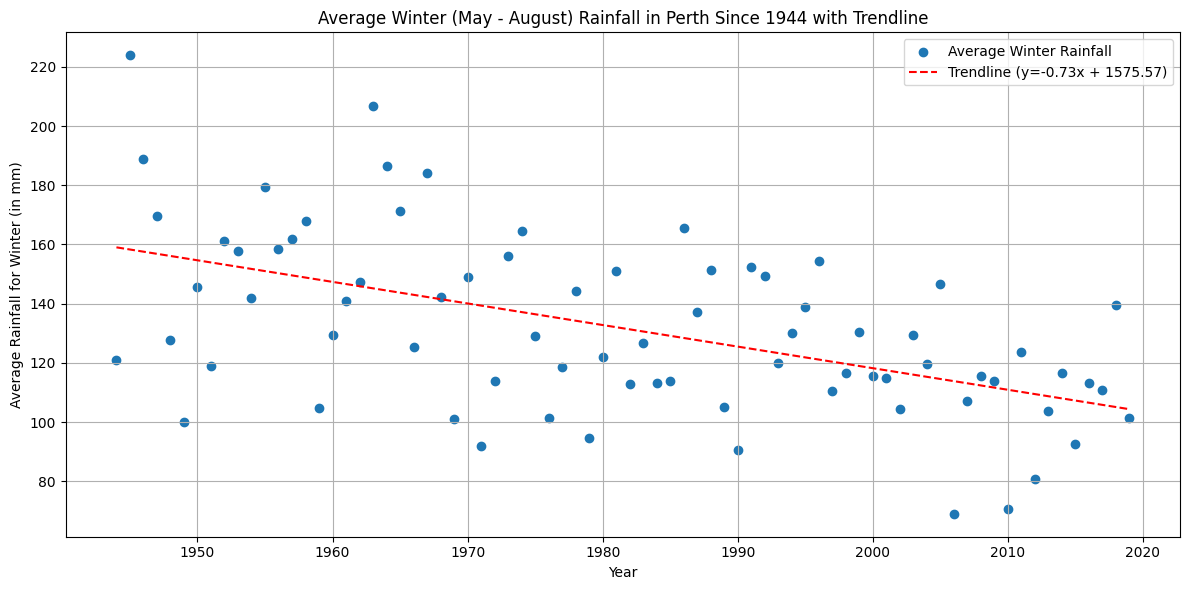


Trendline Equation: y = -0.73x + 1575.57
R-squared value: 0.28
p-value: 6.998670645292783e-07


In [178]:
# Problem 2(c) - grouping all winter rainfall

# returning to our original df
winter_months = [5,6,7,8] # the MONTH column is in numerical format
winter_perth_df = perth_df[perth_df['MONTH'].isin(winter_months)].copy()

# creating our winter average
winter_annual_df = winter_perth_df.groupby('YEAR')['PRCP'].mean().reset_index()
winter_annual_df.rename(columns={'PRCP': 'WINT_AVG_RAINFALL'}, inplace= True)


# plotting the trendline
w_slope, w_intercept, w_r_value, w_p_value, w_std_err = linregress(winter_annual_df['YEAR'], winter_annual_df['WINT_AVG_RAINFALL'])
w_trendline = w_slope * winter_annual_df['YEAR'] + w_intercept

# assembling a scatterplot
plt.figure(figsize=(12, 6))
plt.scatter(winter_annual_df['YEAR'], winter_annual_df['WINT_AVG_RAINFALL'], label='Average Winter Rainfall')
plt.plot(winter_annual_df['YEAR'], w_trendline, color='red', linestyle='--', label=f'Trendline (y={w_slope:.2f}x + {w_intercept:.2f})')

# Add labels and title
plt.xlabel("Year")
plt.ylabel("Average Rainfall for Winter (in mm)")
plt.title("Average Winter (May - August) Rainfall in Perth Since 1944 with Trendline")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Checking our trendline
print(f"\nTrendline Equation: y = {w_slope:.2f}x + {w_intercept:.2f}")
print(f"R-squared value: {w_r_value**2:.2f}")
print(f"p-value: {w_p_value}")

# 2(c) Interpretation

The initial version of this scatter plot from just the July data showed a fairly even scatter, however the inclusion of the winter seasonal average has made the scatter trend more pronounced. 

For my statistical test I looked at the trendline, which I copied into the diagram here. This enhanced the scatter plot and makes it fairly clear that the overall movement is downward in terms of rainfall, and the R^2^ value of 0.28 shows that this trend explains a fair amount of the variation in this dataset (with a p-value of ~7x10^-7^ so we can feel confident in the statistical significance of these results). The earlier effort in statistical modeling also generated slopes and R^2^ values, however given that p-values were not statistically significant and the R^2^ values were 0.01 for both the early half and the later half of the data, this latest trendline with the average winter season is statistically speaking more useful for furthering our understanding responsibly.

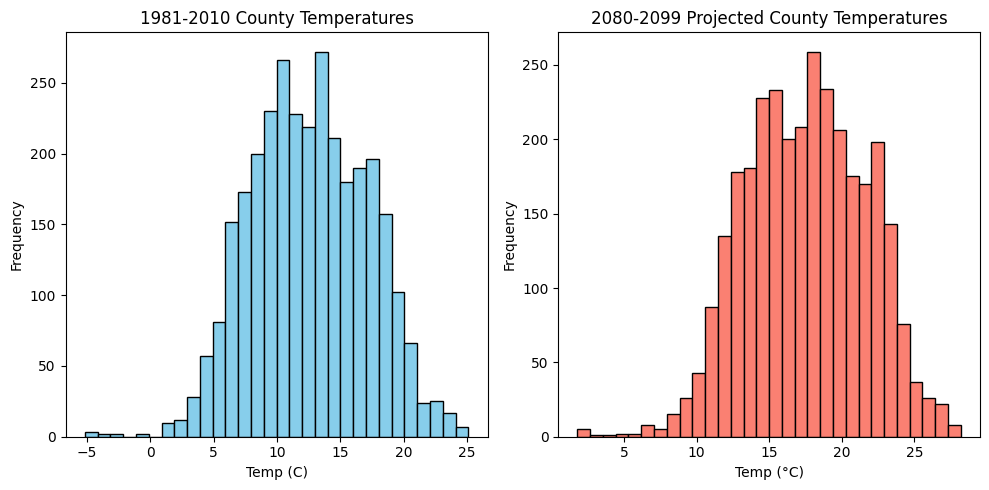

In [179]:
# 3(a) Histogram of temperature from 1981-2010

# setting up for two plots together
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first histogram in the first subplot
axes[0].hist(us_temp_df['normal_1981_2010'], bins=30, color= 'skyblue', edgecolor= 'black')
axes[0].set_title('1981-2010 County Temperatures')
axes[0].set_xlabel('Temp (C)')
axes[0].set_ylabel('Frequency')

# Plot the second histogram in the second subplot
axes[1].hist(us_temp_df['rcp85_2080_2099'], bins=30, color= 'salmon', edgecolor= 'black')
axes[1].set_title('2080-2099 Projected County Temperatures')
axes[1].set_xlabel('Temp (°C)')
axes[1].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

# 3(a) - interpretation

As can be expected, the predicted temperatures in 2080-2099 show a strong rightward shift towards climate extremes/increased annual average temperatures. Interestingly, the distribution of counties in the histogram retains a vague bell shaped distribution, which means we can expect these predicting climate changes to be roughly evenly distributed across US counties.

In [180]:
# 3(b) Calculated Income Deciles

# first, merging the data
us_merged_df = pd.merge(us_temp_df, us_income_df, left_on= 'fips', right_on= 'fips', how= 'inner')

# next, creating our deciles for income
us_merged_df['income_deciles'] = pd.qcut(us_merged_df['income_per_capita_2018'], q= 10, labels= False) + 1

# next, grouping by our average temperatures for the time period
average_temps_df = us_merged_df.groupby(['income_deciles'])[['normal_1981_2010','rcp85_2020_2039', 'rcp85_2040_2059', 'rcp85_2080_2099']].mean().reset_index()

print(average_temps_df)

   income_deciles  normal_1981_2010  rcp85_2020_2039  rcp85_2040_2059  \
0               1         15.358387        16.633868        17.691613   
1               2         14.776277        16.072329        17.146552   
2               3         14.035352        15.345230        16.438157   
3               4         13.123866        14.474455        15.595498   
4               5         12.707270        14.066774        15.180011   
5               6         11.979100        13.351000        14.496838   
6               7         11.394605        12.767488        13.907949   
7               8         10.901554        12.292372        13.458074   
8               9         10.237478        11.643873        12.826313   
9              10         10.980983        12.333084        13.454950   

   rcp85_2080_2099  
0        20.045851  
1        19.539103  
2        18.872312  
3        18.082923  
4        17.686174  
5        17.057449  
6        16.481029  
7        16.086495  
8      

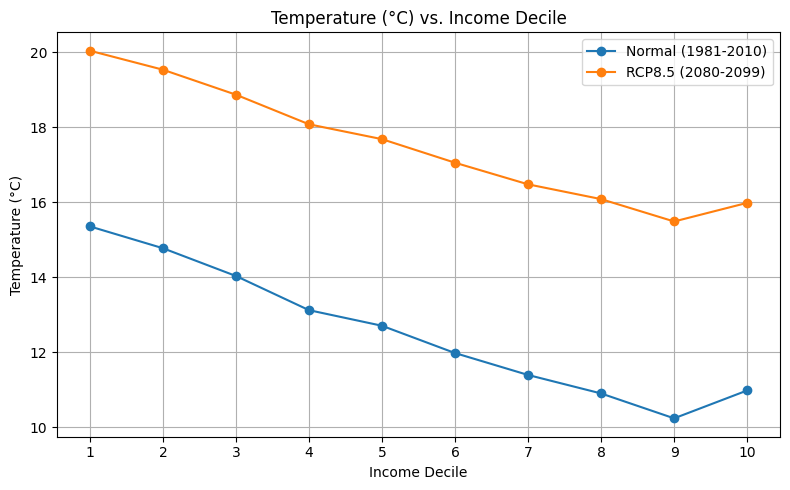

In [181]:
# 3(c) - Plotting Average temp for the selected timeslots

plt.figure(figsize=(8, 5))
plt.plot(average_temps_df['income_deciles'], average_temps_df['normal_1981_2010'], marker='o', label='Normal (1981-2010)')
plt.plot(average_temps_df['income_deciles'], average_temps_df['rcp85_2080_2099'], marker='o', label='RCP8.5 (2080-2099)')

# plot design
plt.xlabel('Income Decile')
plt.ylabel('Temperature (°C)')
plt.title('Temperature (°C) vs. Income Decile')
plt.xticks(average_temps_df['income_deciles']) 
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 3 (d) - Interpretation

I plotted both on the same chart to aide in the visual simplicity, I understand that the prompt said "plots" but this way they are on the same scale and nearby one another. In this way, we can see that we would predict that the poorest American (counties) would be expected to experience the hottest temperature under a changing climate scenario. However, towards the extreme end of the income decile range we see a slight uptick in the expected temperature in the RCP8.5 Scenario, with this likely representing the increased shift in wealth towards California and other Sunshine Belt states, whereas historically the wealthiest Americans lived in the coldest parts (New York City, Boston, Chicago). 

__However__, this data set is only able to model based on the currently available information, and it is quite likely that as climate change becomes more extreme, the wealthiest Americans will be able to afford to move away from the zones with dangerous temperature/flood risk, so this is likely a poor predictor of future counties where wealth will be concentrated, but it serves as a reasonable estimate for now.


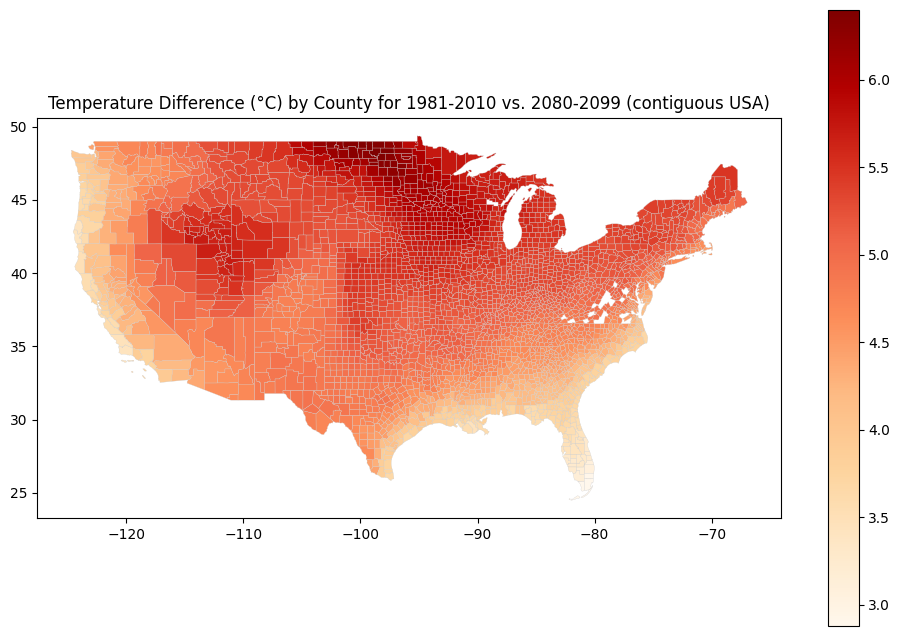

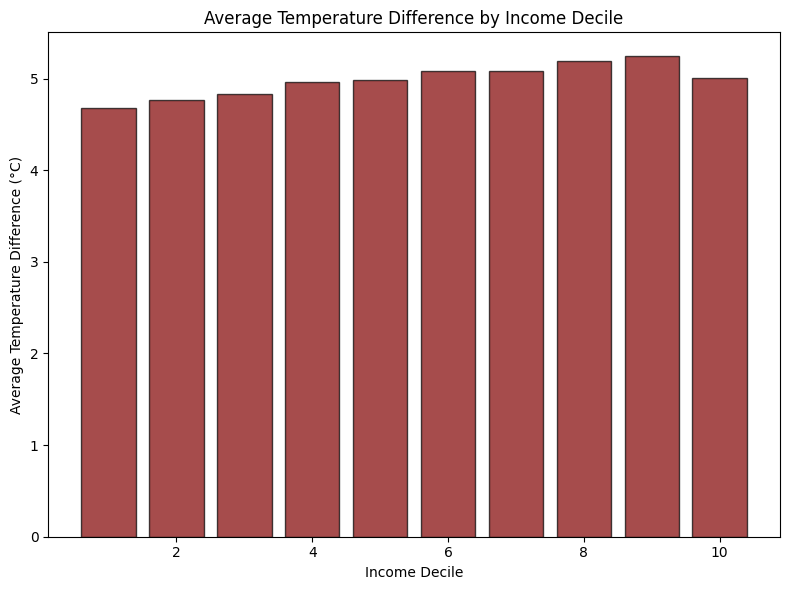

In [182]:
# 3(e) plotting our new variable

# creating a new variable for the temperature change
us_merged_df['temp_diff'] = us_merged_df['rcp85_2080_2099'] - us_merged_df['normal_1981_2010']

# Creating both a chropleth map (for clarity on part 2) and a histogram based on county data

# choropleth map of temp change
us_counties = geopandas.read_file("counties.geojson")

# standardizing our fips codes
us_counties['GEOID'] = us_counties['GEOID'].astype(int)
us_merged_df['fips'] = us_merged_df['fips'].astype(int)

# creating a merged dataframe for geospatial reference
merged_gdf = us_counties.merge(us_merged_df, left_on='GEOID', right_on='fips', how='left')

# removing PR, AK, and HI to make the map reasonable
merged_gdf = merged_gdf[~merged_gdf['STATEFP'].isin(['02', '15', '72'])]

# plotting the choropleth
fig1, ax1 = plt.subplots(1, 1, figsize=(12, 8))
merged_gdf.plot(column='temp_diff',
                cmap='OrRd',  
                linewidth= 0.2,
                ax=ax1,
                edgecolor='0.8',
                legend=True)

ax1.set_title('Temperature Difference (°C) by County for 1981-2010 vs. 2080-2099 (contiguous USA)')


# Plot the histogram of income deciles
# calculation step
avg_temp_diff_by_decile = merged_gdf.groupby('income_deciles')['temp_diff'].mean().reset_index()

# plotting step
fig2, ax2 = plt.subplots(1, 1, figsize=(8, 6))
ax2.bar(avg_temp_diff_by_decile['income_deciles'], avg_temp_diff_by_decile['temp_diff'], color= 'maroon', edgecolor='black', alpha=0.7) # Bins represent temp_diff
ax2.set_title('Average Temperature Difference by Income Decile') 
ax2.set_xlabel('Income Decile')
ax2.set_ylabel('Average Temperature Difference (°C)')

plt.tight_layout()
plt.show()

# 3(e) - Interpreting Our Results

In order to best interpret the spatial pattern of the results I decided to do a little extra work and make a choropleth, which was absolutely essential for me to understand what the data was showing. The map clearly shows that there __will not__ be even impacts from climate change felt across the US, rather that there will be pockets in the Mountain West and the Upper Midwest where the upwards temperature swing will be more severe than the rest of the country. However, looking at the average temperature change by decile (bar chart), we can see that the changes will roughly impact across average income brackets evenly, indeed with a slight bias towards the lower end of the socio-economic spectrum recieving less impact from the changing climate. More likely than not, this represents the areas of historic wealth distribution in the United States, where cities like New York, Boston, Philly, and of course Chicago are wealthier than major cities in Southern states, where the upwards temperature change is predicted to be less severe. This data would be improved by instead of tracking the migration patterns of wealthy individuals as opposed to the locations that currently have high incomes.

# 3(f) - Exploring Policy Ideas

As a policy-maker, our goals in the face of climate change -- which clearly per the choropleth map will be impacting the entire country -- should be unified around elevating _all_ people, with a _special emphasis on those whose livelihoods will be_ __most__ _disrupted by climate change_. There will certainly be disruptions across many sectors, but in particular those reliant on agricultural-sector careers will be impacted by the rising temps we see here, so a better analysis we would want to run as policy makers here would be to create a list of climate-vulnerable careers, pull data from the American Community Survey, and create an index _by county_ that shows us which counties are facing the greatest risk. Some jobs can be relocated of course, but people are highly averse to moving from home unless absolutely necessary, so it is far smarter as policy makers to identify counties with the highest professional vulnerability and connect those with members of Congress who represent the area and would be motivated to engage in policy reform.

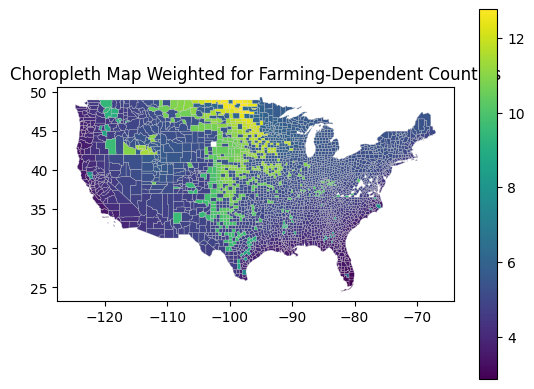

In [183]:
# 3(g) -- Adding a new indicator

# importing new data from the USDA - ERS
usda_df = pd.read_csv('2015CountyTypologyCodes.csv')
usda_df['FIPStxt'] = usda_df['FIPStxt'].astype(int)

new_merged_gdf = merged_gdf.merge(usda_df, left_on='GEOID', right_on='FIPStxt', how='left')


# creating the choropleth map with adjusted weights
fig, ax = plt.subplots(1, 1)
new_merged_gdf.plot(
    column= new_merged_gdf['temp_diff'] * (1 + new_merged_gdf['Farming_2015_Update']),
    cmap='viridis',
    linewidth=0.2,
    ax=ax,
    edgecolor='0.8',
    legend=True
)

ax.set_title('Choropleth Map Weighted for Farming-Dependent Counties')

plt.show()

# 3(g) - Bonus! New Indicator

For this analysis, I felt that it would be best to adjust the choropleth to color for the counties with the greatest degree of vulnerability to climate risk, which I will define as farming-dependent counties that are also high in terms of predicted temperature increase within the RCP 8.5 data. This new color scheme represents the relative social risk for these counties that are dependent on climate sensitive industries

Data source: [USDA Economic Research Service](https://www.ers.usda.gov/data-products/county-typology-codes)

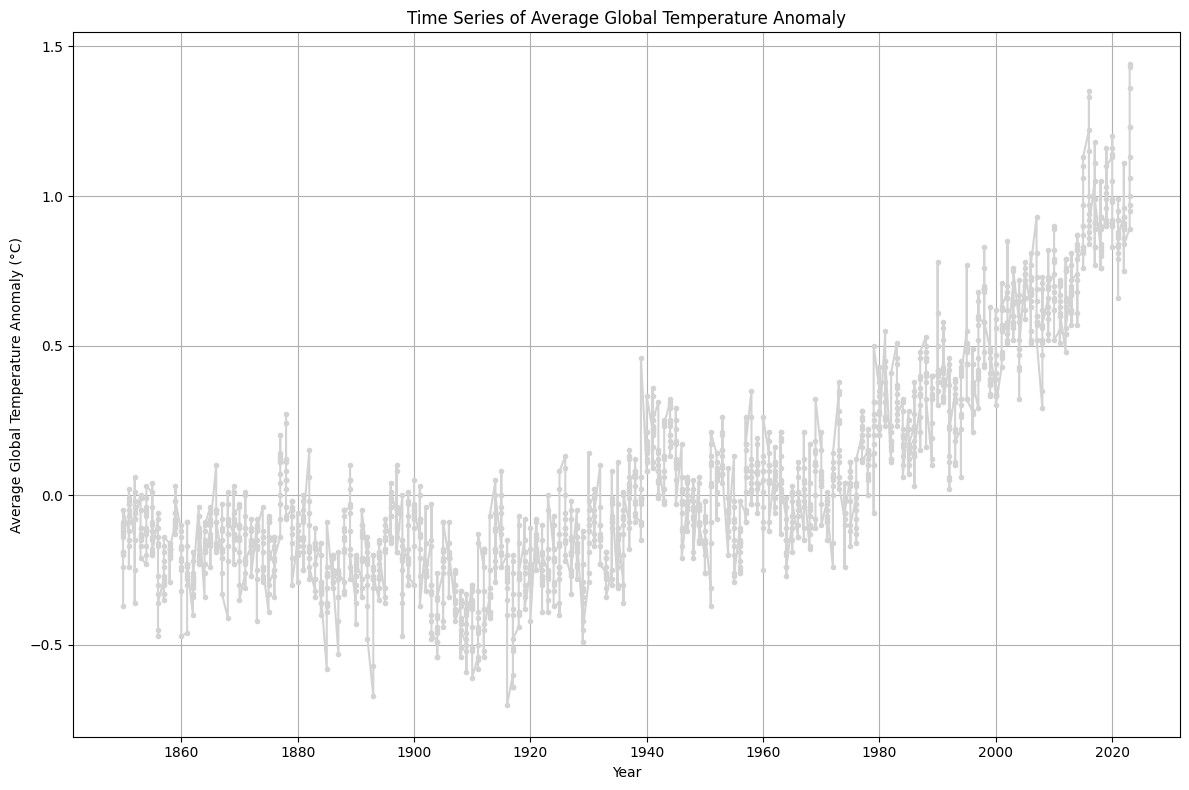

In [184]:
# 4 (a) Simple time series
# fixing the data -- the conversion needs to split up the information

# extracting year and month
def extract_year_month(year_month):
    year = int(str(year_month)[:4])
    month = int(str(year_month)[4:])
    return year, month

# splitting the time column into its components
gmst_df['Year_new'], gmst_df['Month'] = zip(*gmst_df['Year'].apply(extract_year_month))
gmst_df['Year_new'] = pd.to_datetime(gmst_df['Year_new'], format='%Y')

# plotting the data correctly
plt.figure(figsize=(12, 8)) 
plt.plot(gmst_df['Year_new'], gmst_df['Anomaly'], marker= 'o', markersize= 3, linestyle='-', linewidth= 1.5, color='lightgrey')
plt.title('Time Series of Average Global Temperature Anomaly')
plt.xlabel('Year')
plt.ylabel('Average Global Temperature Anomaly (°C)')
plt.grid(True)
plt.tight_layout()
plt.show()

# 4(b) - Commentary on the chart generated in 4(a)

There are a few key trends that are visible in the chart above:

- __Upward Acceleration the past 50 years__: Since the 1950s, following the end of WWII, we can see that a key element of the post-war world and rebuilding of Europe resulted in booming manufacturing, construction, and all manner of high-emissions activities that have continued to grow as population's have skyrocketed. Indeed in 1955 the world population was around 2.5 billion, doubling by 1987 to 5 billion, and that upwards trend mirrors what we see in the chart above.

- __Stable Varitaion from ~1850 to 1900__: Despite this era containing some of the early days of the Industrial Revolution, this early era in the chart appears fairly flat/stable. There is of course some spikes and variation, but we can see that these early days of CO~2~ emissions were still accumulating in the atmosphere and had not yet had a notable impact on the overall average climate. As the world exited the Little Ice Age, a period of generally cooler temps, it is reasonable to extrapolate that the CO~2~ emissions stemming from Industrialization were yet to accumulate in the atmosphere enough to cause a consistent shift in the climate.

- __Specific Incidents such as the Krakatoa Eruption of 1883 Can Be Spotted in This Data__: Another curiours trend we can observe in this chart are the effects of some specific planetary-disruptive activities, such as the spike downwards in global temperatures following the Krakatoa Eruption in 1883. This event released aerosols into the atmosphere at such high concentrations that it reduced the strength of sunlight on the Earth briefly (and also is a contributing factor to the rise of the Impressionist Art Movement). Additionally, global wars (WWI, WWII) can be seen impacting global temperature anomalies, likely due to the mass disruptions of economic activity, but looking closely at say the start of WWII in September of 1939, we can see that there is a global dip in the climate anomaly data. 

# 4(c) - Exploring alternative modeling approaches

__The climate spiral__ reminds me of when I try to play with a Hula hoop and it gets increasingly harder and harder to maintain the same smooth spinning! Joking aside, this format presents a compelling method by which we can explain that the world's warming pattern is pulling towards the extremes and that the process is rapidly devloving. Linguistically, the term 'spiraling' tends to be used to describe an increasingly bad situation, so it gets bonus points in terms of conveying the depth of the crisis. This visual does not do a good job of conveying what the impacts of this would mean for an indvidual, whereas the original time series showed to the reader that they could expect the climate to be pushing upwards in terms of °C.


__The Climate Stripes__ offer a simpler system than the climate spiral, and indeed this type of simple color palatte speaks to the average reader a lot more easily than do the other styles we have discussed so far. First, this anchored relatively to the average temperature from 1961 to 2010, which is a time period that the average adult can actually remember, whereas the time-series and the spiral compare to temperatures from the 1800's! Second, the colors in this are much more pronounced than in the climate spiral, again making it easier for the reader to see the distinction.

# 4(d) - New Data Viz for Climate Change Ideas:

Climate change data suffers from the scale not being one that an individual can easily grasp, and my first suggestion would be to take the most compelling of the models we have seen so far (the Climate Stripes) and create a dashboard or similar dropdown menu that allows for a person to look up their home (country, town, as granular as possible) data to see _how this has impacted them locally_. It is incredibly hard to motivate people to take on global efforts like this if there aren't easily tangible ways for them to conceptualize how harshly the crisis is impacting them locally. To the extent that data for this exists, having two parallel bars of climate stripes, one being global and one being local, would be an excellent data visualization.

Thinking critically about the end users of these types of charts, we know that climate change is of [global concern](https://climatepromise.undp.org/news-and-stories/worlds-largest-survey-climate-change-out-heres-what-results-show), however visualising in a relatable format to the broader public is difficult, and one way I think this gap could be bridged is framing the anomaly years as credit card debt. This is a fairly common financial mechanism globally, and it provides a good intuitive understanding as to why weather may be good (an individual month's expenses in this metaphor), but the overall climate is a growing concern (we are not paying off our balance and are accumulating runaway debt because of the interest). The idea of a planetary 'budget' for CO~2~ is one that I think could appeal because of it's synergistic fit with this metaphor!